# Infiltration excess process


Basato sui notebook di Niccolò Tubini e Riccardo Rigon

Autori: Alessandro Lagrecacolonna, Niccolò Schiavi Cappello, Marco Feltrin

## Introduzione

In questo notebook si vuole esaminare la produzione di runoff superficiale in seguito ad un processo di saturazione dall'alto.

Si è eseguita un'analisi su una colonna stratigrafica di Bieno, utilizzando le precipitazioni reperite sul sito di Meteo-Trentino e prendendo come periodo campione un mese: dal 25/10/2019 al 25/11/2019.

Anche in questo caso si è considerata la temperatura ininfluente ai fini dell'analisi

<figure>
    <img src="colonna_stratigrafica.jpg" width="800" height="800/1.618">
    <figcaption>Colonna stratigrafica di Bieno. </figcaption>
<figure>

In [2]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')


project_path = os.path.dirname(os.getcwd())


grid_input_file_name = project_path + "/WETGEO/Grid_input/ex2955_grid_ie.csv"     #importa la griglia

ic_input_file_name = project_path + "/WETGEO/Grid_input/ex2955_ic_dry.csv"        #importa il file delle condizioni iniziali dry

parameter_input_file_name = project_path + "/WETGEO/Grid_input/Richards_VG.csv"   #importa il file con i parametri di Van Genuechten

dictionary_input_file_name = project_path + "/WETGEO/Grid_input/dictionary.csv"   #importa il dictionary con le specifiche dei suoli

grid_type = 'classical'                                                           #griglia di tipo classico a maglie regolari

dz_min = -9999       # not required for grid_type = 'classical'

dz_max = -9999       # not required for grid_type = 'classical'

b = -9999            # not required for grid_type = 'classical'

psi_interp_model = "linear"                    #interpolazione lineare di psi

T_interp_model = "linear"                      #interpolazione lineare della temperatura

water_ponding_0 = -105.0                       #condizione di suzione iniziale sulla superficie

T_water_ponding_0 = 273.15

output_file_name =  project_path + "/WETGEO/Grid_NetCDF/ex2955_grid_dry.nc"     #crea un file NetCDF con tutte le informazioni sulla griglia

output_title = '''Computational grid for ex2955 dry initial condition.
                  '''
output_summary = '''

'''

output_date = ''

output_institution = 'GEOframe'



In [3]:
data_grid = pd.read_csv(grid_input_file_name)
# print('Grid')
# print(data_grid)
# print()

data_ic = pd.read_csv(ic_input_file_name)
# print('IC')
# print(data_ic)
# print()

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
# print('Parameter')
# print(data_parameter)
# print()

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=True)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, water_ponding_0=water_ponding_0, T_water_ponding_0=T_water_ponding_0, shallow_water=True)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\nicco\Desktop/WETGEO/Grid_NetCDF/ex2955_grid_dry.nc


## Riepilogo delle impostazioni della simulazione eseguita tramite OMS console:

In [5]:
# %load C:\Users\Niccolo\OMS\OMS_Project_WHETGEO1D_Idrologia_ay_21_22\simulation\WHETGEO1D_ex03_wet.sim
/*
* WHETGEO-1D ex03
* 
* Author: Niccolo` Tubini and Riccardo Rigon
*/
import static oms3.SimBuilder.instance as OMS3
import static oms3.SimBuilder.*
def home = oms_prj



def richardsGridFileName = "$oms_prj//WETGEO/Grid_NetCDF/ex2955_grid_dry.nc"

def typeClosureEquation = "{Water Depth,Van Genuchten}"             #si è utilizzato il modello di Van Genuechten

def typeEquationState = "{Water Depth,Van Genuchten}"

def typeUHCModel = "{null,Mualem Van Genuchten}"

def typeUHCTemperatureModel = "notemperature"                       #come da ipotesi non si è considerata la temperatura

def interfaceHydraulicConductivityModel = "max"                       #all'interfaccia tra strati si utilizza il k massimo tra i due

def topBCType = "Top Coupled"                                         #condizione al contorno in superficie accoppiata 

def bottomBCType = "Bottom Dirichlet"                                 #condizione di Dirichelet al fondo

def maxPonding = 0.0

def stationID = "1"

def startDate= "2019-10-25 00:00"

def endDate= "2019-11-25 00:00"

def tTimestep = 5                                                    #si è utilizzato un timestep di 5 minuti

def topBCFileName = "$oms_prj//WETGEO/Timeseries/ex2955_rainfall.csv"  #è il file contenente le precipitazioni di Bieno 

def bottomBCFileName = "$oms_prj//WETGEO/Timeseries/ex2955_dirichlet_dry.csv"   #file contenente le condizioni al contorno sul fondo 

def saveDatesFileName = "$oms_prj//WETGEO/Timeseries/ex2955_save_dates_wet.csv" #file contenente le date del periodo in analisi

def outputFileName = "$oms_prj//WETGEO/output/ex2955_dry.nc"


def writeFrequency = 10000


solver = OMS3.sim(name: "Integrate PDE", {

resource "$oms_prj/dist"

	model(while : "reader_data_topBC.doProcess"  ){

		components {
			
			// reads of the grid.nc file
			"readNetCDF" "it.geoframe.blogpsot.netcdf.monodimensionalproblemtimedependent.ReadNetCDFRichardsGrid1D"
			
			// solve Richards' equation
			"solver" "it.geoframe.blogspot.whetgeo1d.richardssolver.RichardsSolver1DMain"
			
			// time-series reader
			"reader_data_topBC"         "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"reader_data_bottomBC"      "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"reader_data_save_dates"    "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			
			// this component stores solver's output during the simulation
			"buffer" "it.geoframe.blogspot.buffer.buffertowriter.RichardsBuffer1D"
			
			// output writer in a NetCDF format
			"writeNetCDF" "it.geoframe.blogpsot.netcdf.monodimensionalproblemtimedependent.WriteNetCDFRichards1DDouble"
		
		}
		
		parameter {

			"readNetCDF.richardsGridFilename" "${richardsGridFileName}"


			"solver.typeClosureEquation" "${typeClosureEquation}"
			

			"solver.typeEquationState" "${typeEquationState}"


			"solver.typeUHCModel" "${typeUHCModel}"


			"solver.typeUHCTemperatureModel" "${typeUHCTemperatureModel}"

            
			"solver.interfaceHydraulicConductivityModel" "${interfaceHydraulicConductivityModel}"
						

			"solver.topBCType"  "${topBCType}"

            
			"solver.bottomBCType"  "${bottomBCType}"
			
			"solver.maxPonding" "${maxPonding}"

            
			"solver.stationID"  "${stationID}"
			

			"solver.newtonTolerance" "0.00000000001"


			"solver.nestedNewton" "1"


			"solver.tTimeStep" tTimestep*60


			"solver.timeDelta" tTimestep*60

			"reader_data_topBC.file"             "${topBCFileName}"
			"reader_data_topBC.idfield"          "ID"  
			"reader_data_topBC.tStart"           "${startDate}"
			"reader_data_topBC.tEnd"             "${endDate}"
			"reader_data_topBC.tTimestep"        "${tTimestep}"
			"reader_data_topBC.fileNovalue"      "-9999"

			"reader_data_bottomBC.file"             "${bottomBCFileName}"
			"reader_data_bottomBC.idfield"          "ID"  
			"reader_data_bottomBC.tStart"           "${startDate}"
			"reader_data_bottomBC.tEnd"             "${endDate}"
			"reader_data_bottomBC.tTimestep"        "${tTimestep}"
			"reader_data_bottomBC.fileNovalue"      "-9999"
			
			"reader_data_save_dates.file"             "${saveDatesFileName}"
			"reader_data_save_dates.idfield"          "ID"  
			"reader_data_save_dates.tStart"           "${startDate}"
			"reader_data_save_dates.tEnd"             "${endDate}"
			"reader_data_save_dates.tTimestep"        "${tTimestep}"
			"reader_data_save_dates.fileNovalue"      "-9999"
			
			
			"buffer.writeFrequency"                   "${writeFrequency}"

			// folder path for the output files
			"writeNetCDF.fileName" "${outputFileName}"
			// here you can enter a string to describe your simulation
			"writeNetCDF.briefDescritpion"               "WHETGEO-1D ex03 wet initial condition."
			"writeNetCDF.writeFrequency"                 "${writeFrequency}"
			"writeNetCDF.timeUnits"                      "Minutes since 01/01/1970 00:00:00 UTC"
			"writeNetCDF.timeZone"                       "UTC"
			"writeNetCDF.fileSizeMax"                    "10000"
			"writeNetCDF.outVariables"                   "{darcyVelocity}"
			"writeNetCDF.pathGrid"		                 "${richardsGridFileName}"
			"writeNetCDF.pathTopBC"		                 "${topBCFileName}"
			"writeNetCDF.pathBottomBC"	                 "${bottomBCFileName}"
			"writeNetCDF.topBC"		                     "${topBCType}"
			"writeNetCDF.bottomBC"	                     "${bottomBCType}"
			"writeNetCDF.swrcModel"                      "${typeClosureEquation}"
			"writeNetCDF.soilHydraulicConductivityModel" "${typeUHCModel}"
			"writeNetCDF.interfaceConductivityModel"     "${interfaceHydraulicConductivityModel}"
			
		}

		connect{


			"readNetCDF.z"                      "solver.z"
			"readNetCDF.spaceDelta"             "solver.spaceDeltaZ"
			"readNetCDF.psiIC"                  "solver.psiIC"
			"readNetCDF.temperature"            "solver.temperature"
			"readNetCDF.controlVolume"          "solver.controlVolume"
			"readNetCDF.Ks"                     "solver.ks"
			"readNetCDF.thetaS"                 "solver.thetaS"
			"readNetCDF.thetaR"                 "solver.thetaR"
			"readNetCDF.par1SWRC"               "solver.par1SWRC"
			"readNetCDF.par2SWRC"               "solver.par2SWRC"
			"readNetCDF.par3SWRC"               "solver.par3SWRC"
			"readNetCDF.par4SWRC"               "solver.par4SWRC"
			"readNetCDF.par5SWRC"               "solver.par5SWRC"
			"readNetCDF.alphaSS"                "solver.alphaSpecificStorage"
			"readNetCDF.betaSS"                 "solver.betaSpecificStorage"
			"readNetCDF.equationStateID"        "solver.inEquationStateID"
			"readNetCDF.parameterID"            "solver.inParameterID"

			"reader_data_topBC.tCurrent"        "solver.inCurrentDate"
			"reader_data_topBC.outData"         "solver.inTopBC"
			"reader_data_bottomBC.outData"      "solver.inBottomBC"
			"reader_data_save_dates.outData"    "solver.inSaveDate"
			
			
			
			// input buffer
			"solver.inCurrentDate"        "buffer.inputDate"
			"solver.doProcessBuffer"      "buffer.doProcessBuffer"
			"solver.outputToBuffer"       "buffer.inputVariable"

			
			// input writeNetCDF
			"reader_data_topBC.doProcess"        "writeNetCDF.doProcess"
			
			"buffer.myVariable"                  "writeNetCDF.variables"
			
			"readNetCDF.eta"                     "writeNetCDF.spatialCoordinate"
			"readNetCDF.etaDual"                 "writeNetCDF.dualSpatialCoordinate"
			"readNetCDF.controlVolume"           "writeNetCDF.controlVolume"
			"readNetCDF.psiIC"                   "writeNetCDF.psiIC"
			"readNetCDF.temperature"             "writeNetCDF.temperature"
			
			
		}
	}

	}

)


SyntaxError: invalid syntax (928257214.py, line 3)

## Post-processing  <a class="anchor" id="post_processing"></a>

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
from geoframepy.timeseries import io_csv
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,            #False se non si ha installato LaTEX sul computer
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

**Read the output file**

In [8]:
ds = xr.open_dataset(project_path + '/WETGEO/output/ex2955_dry_0000.nc')
ds

<xarray.Dataset>
Dimensions:           (depth: 651, dualDepth: 651, time: 8929)
Coordinates:
  * depth             (depth) float64 -13.19 -13.17 -13.15 ... -0.03 -0.01 0.0
  * dualDepth         (dualDepth) float64 -13.2 -13.18 -13.16 ... -0.02 0.0
  * time              (time) datetime64[ns] 2019-10-25 ... 2019-11-25
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 dry initial condition.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:\Users\marco\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\marco\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\marco\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

In [10]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/WETGEO/Timeseries/ex2955_rainfall.csv',datetime_index=True)
rain.head()

,1
Datetime,
2019-10-25 00:00:00,0.0
2019-10-25 00:05:00,0.0
2019-10-25 00:10:00,0.0
2019-10-25 00:15:00,0.0
2019-10-25 00:20:00,0.0


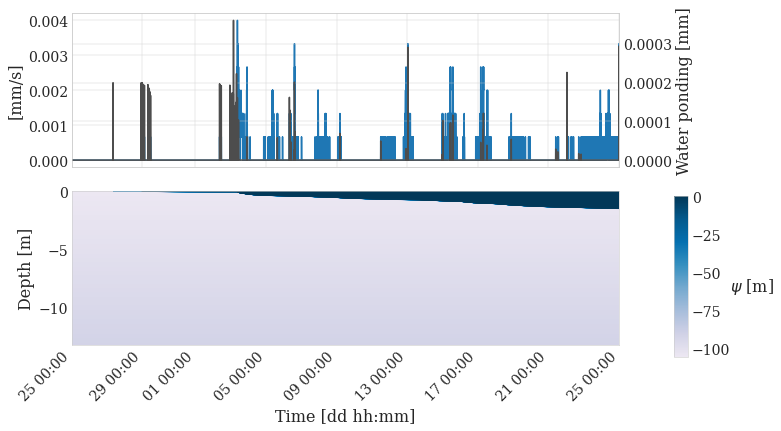

In [11]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['1'][0:8929]/300)
ax[0].set_ylabel('[mm/s]')

ax1=ax[0].twinx()
ds.waterVolume.sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.3')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

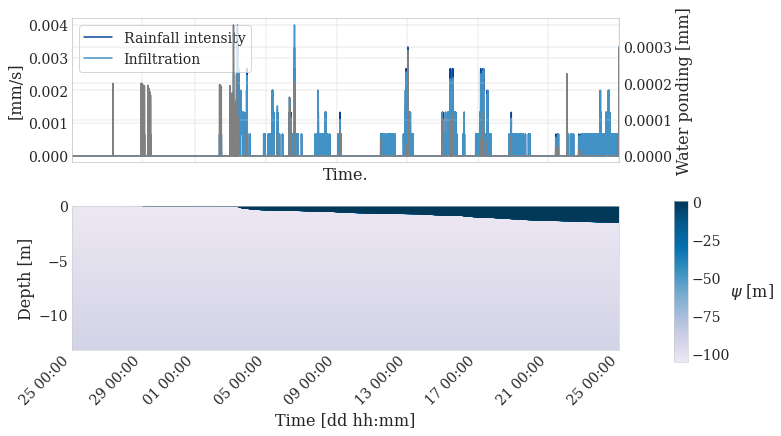

In [12]:
start = '2019-10-25 00:00'
end = '2019-11-25 00:00'

fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.sel(time=slice(start,end)), rain['1'][start:end]/300,  color='#084594', label='Rainfall intensity')
(-ds.darcyVelocity.sel(dualDepth=0, method='nearest')*1000).plot(ax=ax[0], color='#4292c6', label='Infiltration')

ax[0].set_ylabel('[mm/s]')
ax[0].set_title(None)
ax[0].legend(loc='upper left')

ax1=ax[0].twinx()
ds.waterVolume.sel(time=slice(start,end)).sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.5')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.sel(time=slice(start,end)).plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

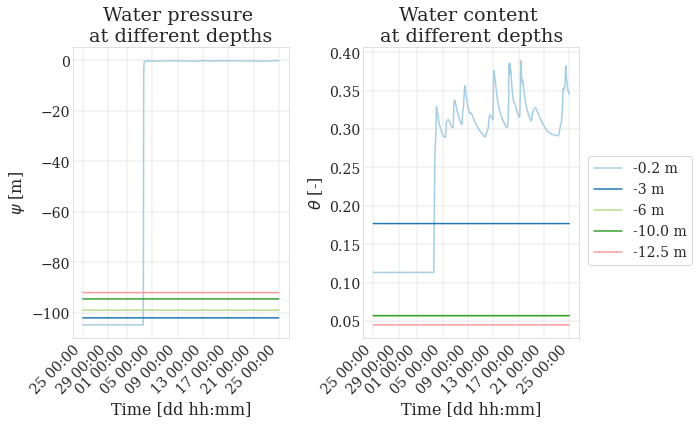

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.2,  method='nearest').plot(ax=ax1, color=colors[0])
ds.psi.sel(depth=-3,  method='nearest').plot(ax=ax1, color=colors[1])
ds.psi.sel(depth=-6,  method='nearest').plot(ax=ax1, color=colors[2])
ds.psi.sel(depth=-10.0,  method='nearest').plot(ax=ax1, color=colors[3])
ds.psi.sel(depth=-12.5,  method='nearest').plot(ax=ax1, color=colors[4])


ax1.set_title('Water pressure \nat different depths')


ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Time [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.2, method='nearest').plot(ax=ax2, label = '-0.2 m', color=colors[0])
ds.theta.sel(depth=-3, method='nearest').plot(ax=ax2, label = '-3 m', color=colors[1])
ds.theta.sel(depth=-6, method='nearest').plot(ax=ax2, label = '-6 m', color=colors[2])
ds.theta.sel(depth=-10.0, method='nearest').plot(ax=ax2, label = '-10.0 m', color=colors[3])
ds.theta.sel(depth=-12.5, method='nearest').plot(ax=ax2, label = '-12.5 m', color=colors[4])

ax2.set_title('Water content \nat different depths')


ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Time [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

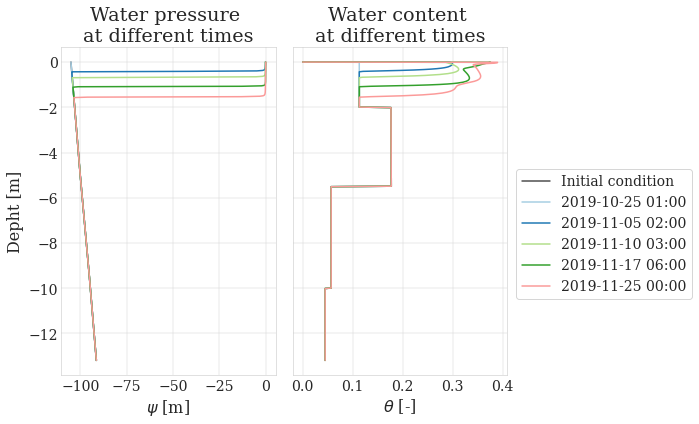

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')
ds.psi.sel(time='2019-10-25 01:00').plot(ax=ax1, y='depth', label='2019-10-25 01:00', color=colors[0])
ds.psi.sel(time='2019-11-05 02:00').plot(ax=ax1, y='depth', label='2019-11-05 02:00', color=colors[1])
ds.psi.sel(time='2019-11-10 03:00').plot(ax=ax1, y='depth', label='2019-11-10 03:00', color=colors[2])
ds.psi.sel(time='2019-11-17 06:00').plot(ax=ax1, y='depth', label='2019-11-17 06:00', color=colors[3])
ds.psi.sel(time='2019-11-25 00:00').plot(ax=ax1, y='depth', label='2019-11-25 00:00', color=colors[4])
# ds.psi.sel(time='2020-01-02 00:00').plot(ax=ax1, y='depth', label='2020-01-02 00:00', color=colors[5])

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

plt.plot(np.nan, np.nan, label='Initial condition', color='0.3')
ds.theta.sel(time='2019-10-25 01:00').plot(ax=ax2, y='depth', label='2019-10-25 01:00', color=colors[0])
ds.theta.sel(time='2019-11-05 02:00').plot(ax=ax2, y='depth', label='2019-11-05 02:00', color=colors[1])
ds.theta.sel(time='2019-11-10 03:00').plot(ax=ax2, y='depth', label='2019-11-10 03:00', color=colors[2])
ds.theta.sel(time='2019-11-17 06:00').plot(ax=ax2, y='depth', label='2019-11-17 06:00', color=colors[3])
ds.theta.sel(time='2019-11-25 00:00').plot(ax=ax2, y='depth', label='2019-11-25 00:00', color=colors[4])
# ds.theta.sel(time='2020-01-02 00:00').plot(ax=ax2, y='depth', label='2020-01-02 00:00', color=colors[5])

ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

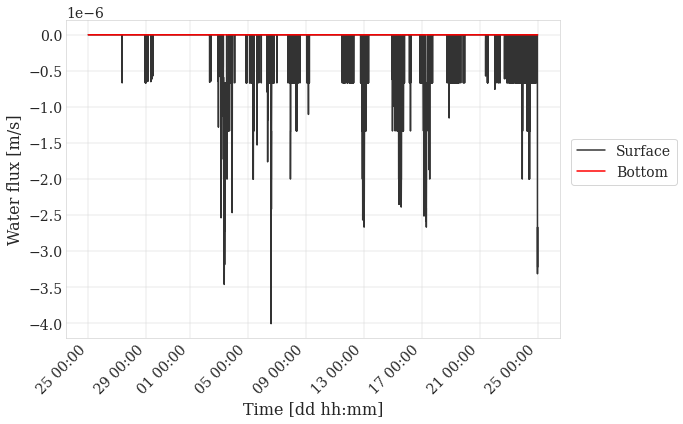

In [16]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

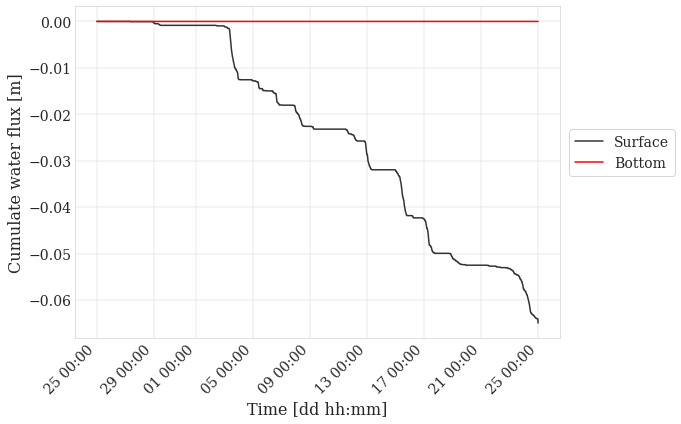

In [17]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()